### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[251201筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/251201%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [ ]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [ ]:
mysys.UpdatestockDatabase()

* 建立「解盤」物件    

In [ ]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **開盤**：加權指數上漲，但還沒站回5日線。  
> 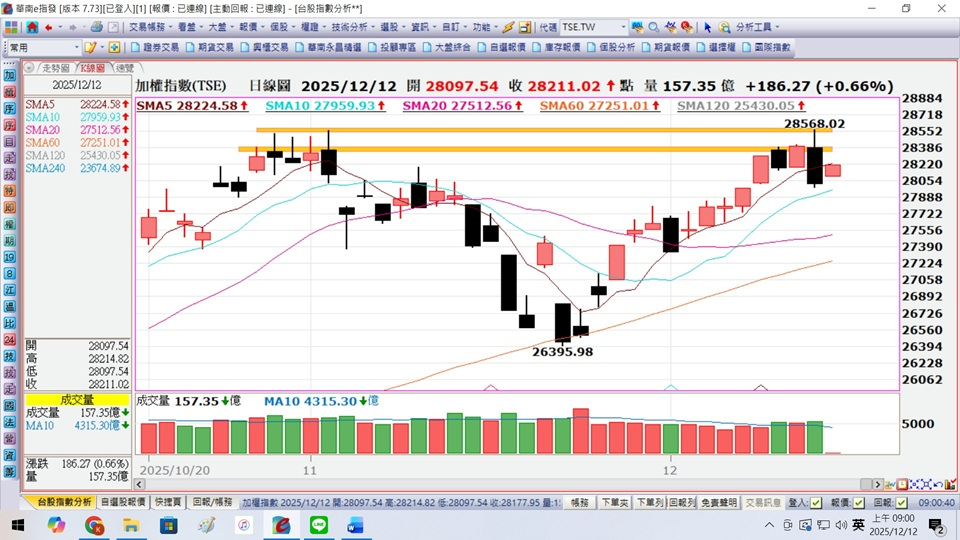  

In [2]:
# 壓力線
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line1_start_date = '2025-10-29'
    resistance_line1_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line1_price      = range_prices.loc['2025-11-04']['High']

    # 壓力線
    resistance_line2_start_date = '2025-10-28'
    resistance_line2_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line2_price      = range_prices.loc['2025-11-04']['Open']
    
    seq_of_seq_of_points=[
        [(resistance_line1_start_date,resistance_line1_price),(resistance_line2_end_date,resistance_line1_price)],
        [(resistance_line2_start_date,resistance_line2_price),(resistance_line2_end_date,resistance_line2_price)],
    ]

    linewidths=[2.5,2.5]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

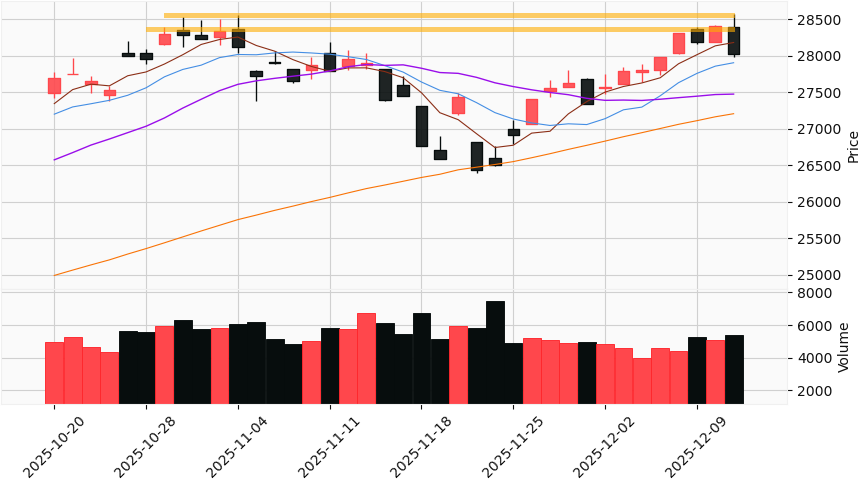

In [3]:
# 收盤：壓力線
image = mysys.DrawOnKlineChart('TAIEX','2025-10-20','2025-12-12',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

In [ ]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **開盤**：櫃買指數相對穩定，守穩5日線之上。  
> 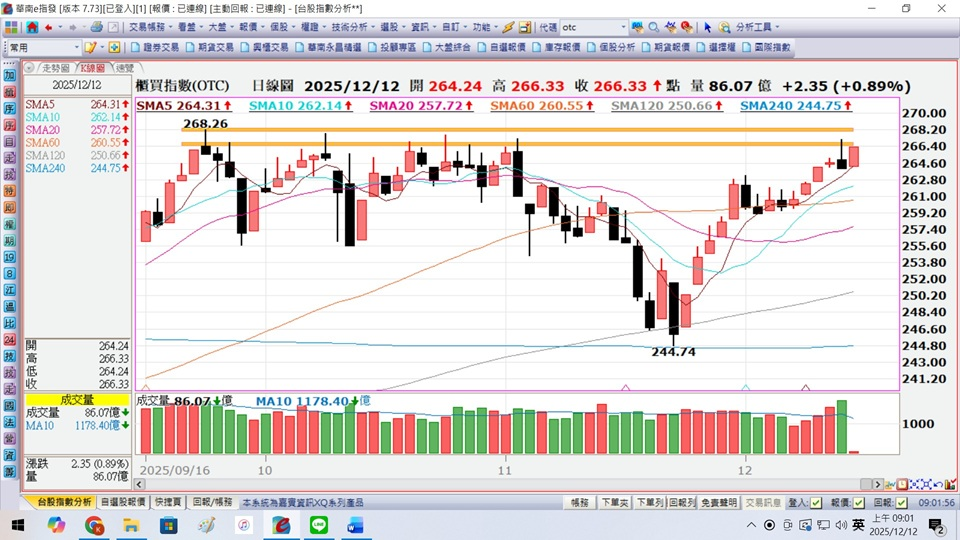  

In [8]:
# 壓力線
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line1_start_date = '2025-09-19'
    resistance_line1_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line1_price      = range_prices.loc['2025-09-23']['Open']

    # 壓力線
    resistance_line2_start_date = '2025-09-19'
    resistance_line2_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line2_price      = range_prices.loc['2025-09-23']['High']
    
    seq_of_seq_of_points=[
        [(resistance_line1_start_date,resistance_line1_price),(resistance_line2_end_date,resistance_line1_price)],
        [(resistance_line2_start_date,resistance_line2_price),(resistance_line2_end_date,resistance_line2_price)],
    ]

    linewidths=[2.5,2.5]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

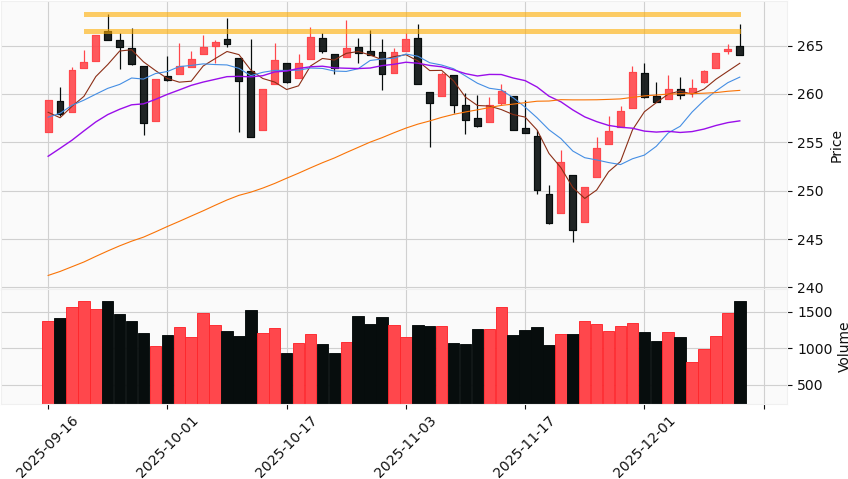

In [9]:
# 收盤：壓力線
image = mysys.DrawOnKlineChart('TPEx','2025-09-16','2025-12-12',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

In [ ]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股觀察  

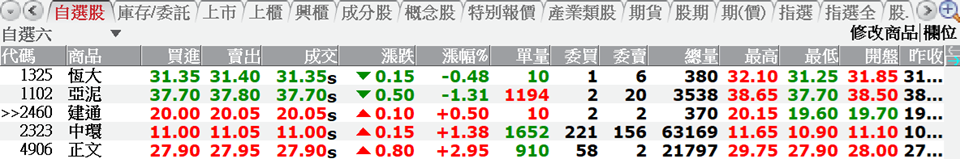  

* 中環(2323)  
  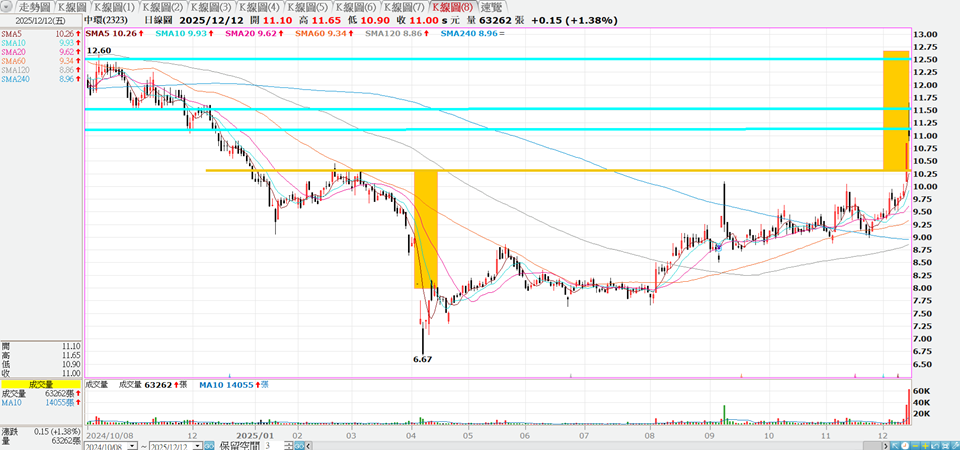  
* 元晶(6443)  
  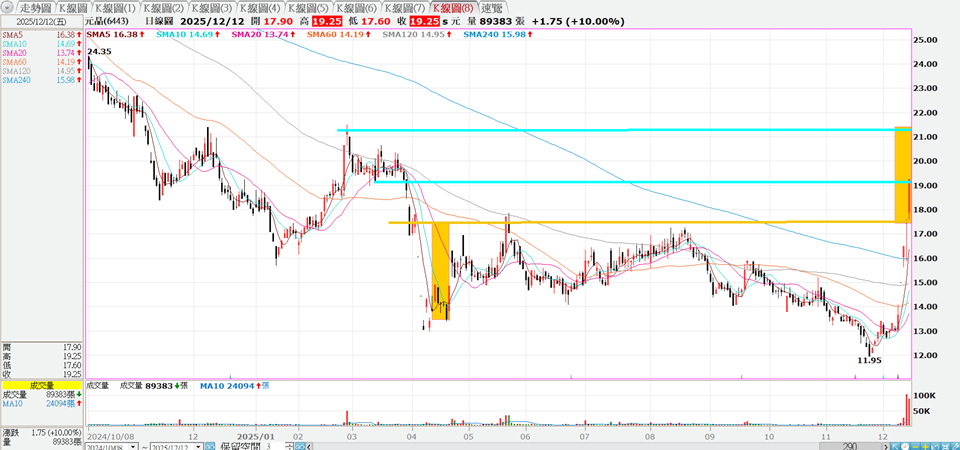  
* 太景*-KY(4157)  
  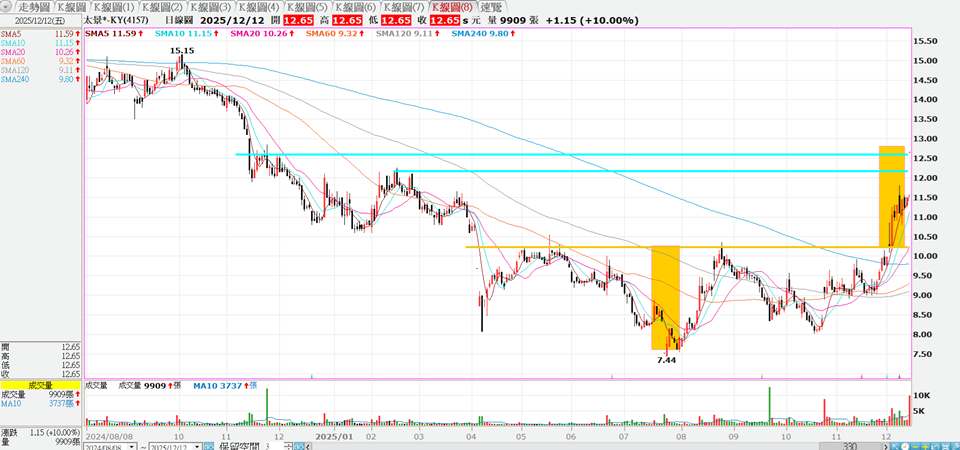  
* 華東(8110)  
  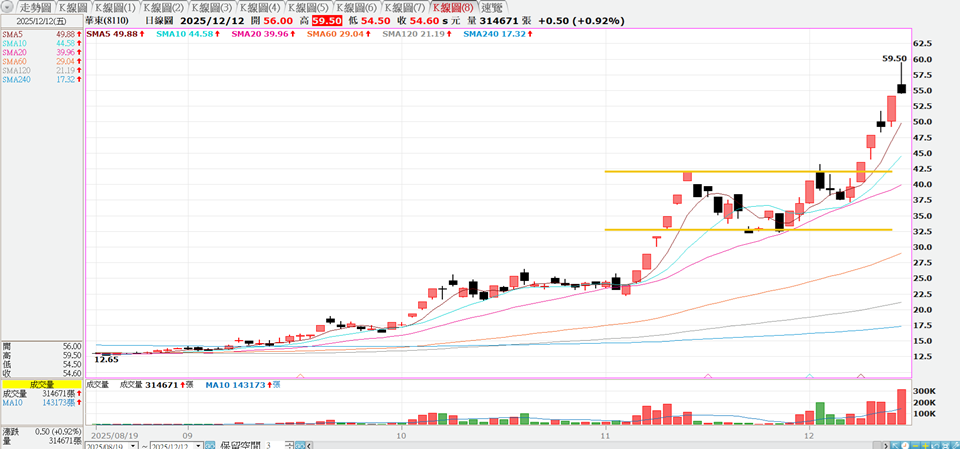  
* 三商壽(2867)  
  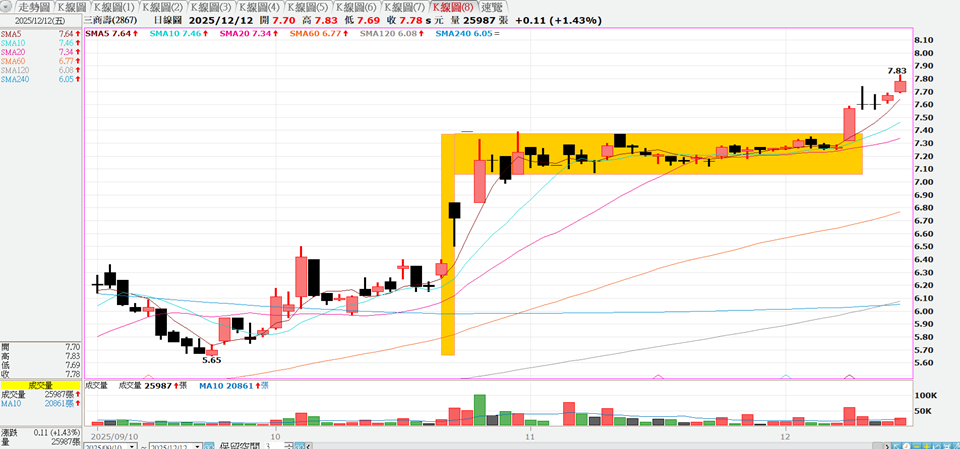  
* 德宏(5475)  
  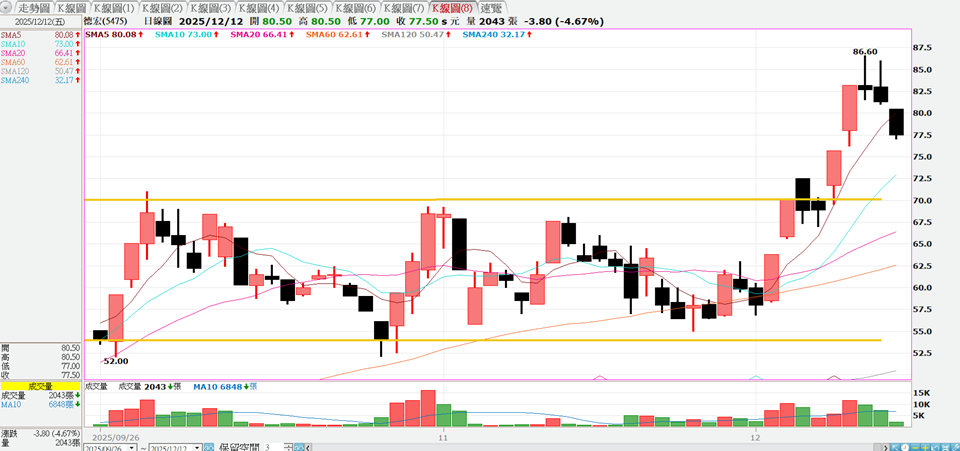  
* 中信金(2891)  
  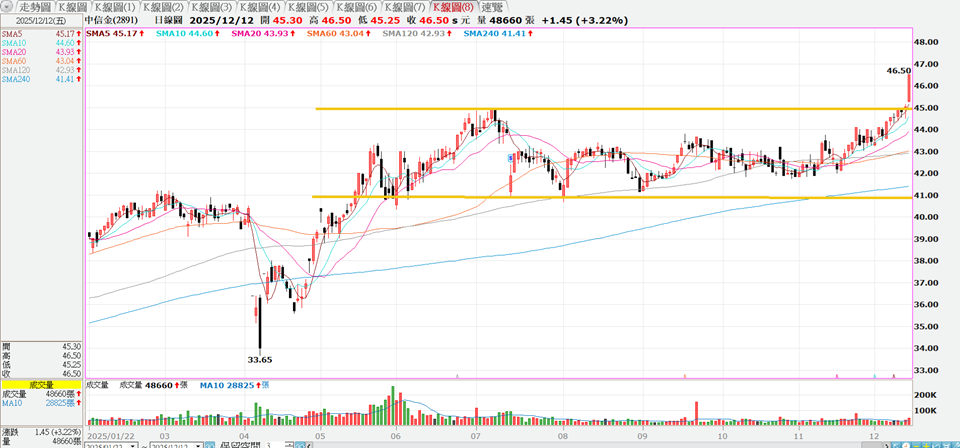  
* 久元(6261)  
  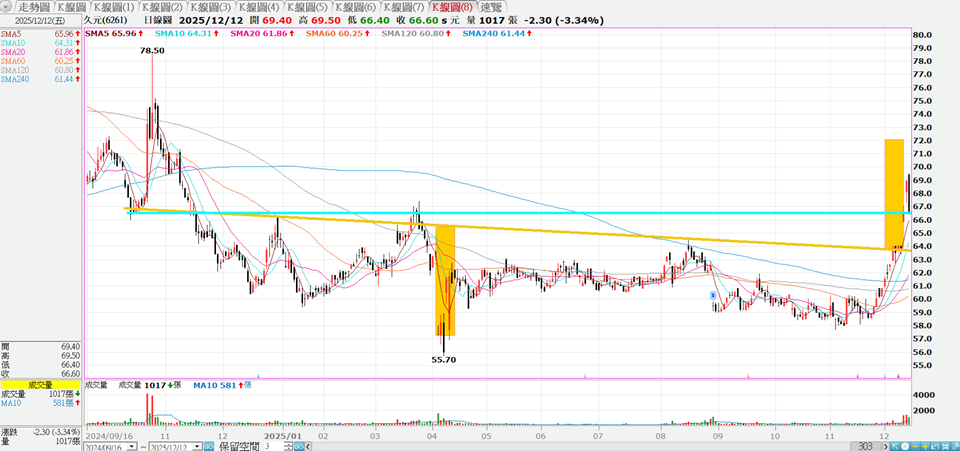  
* 正文(4906)  
  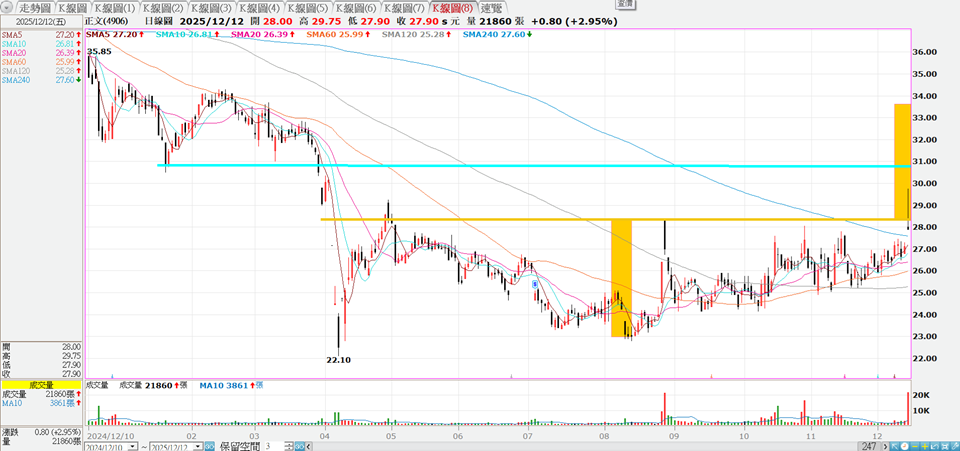  
* 華邦電(2344)  
  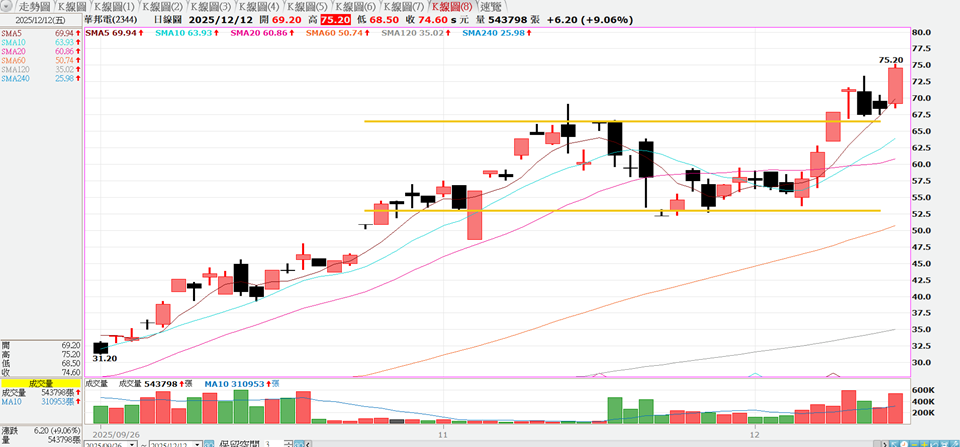  
* 科嶠(4542)  
  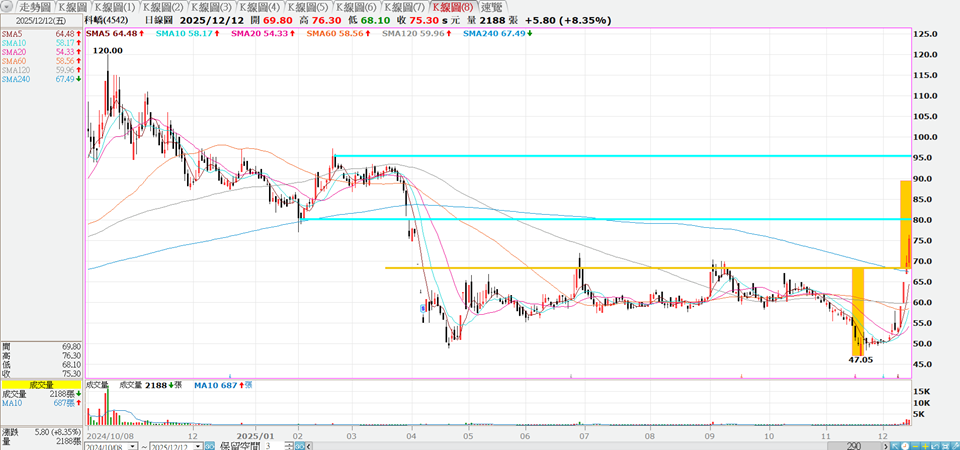  
* 富邦金(2881)  
  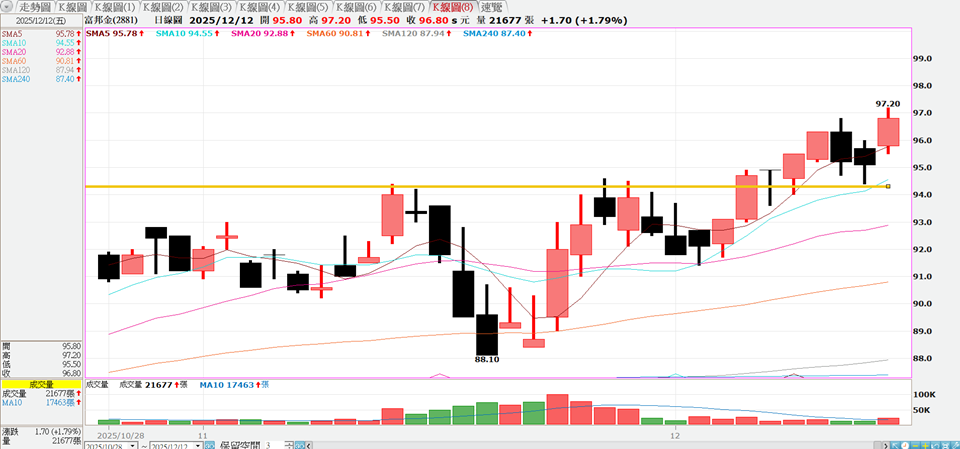  
* 凱基金(2883)  
  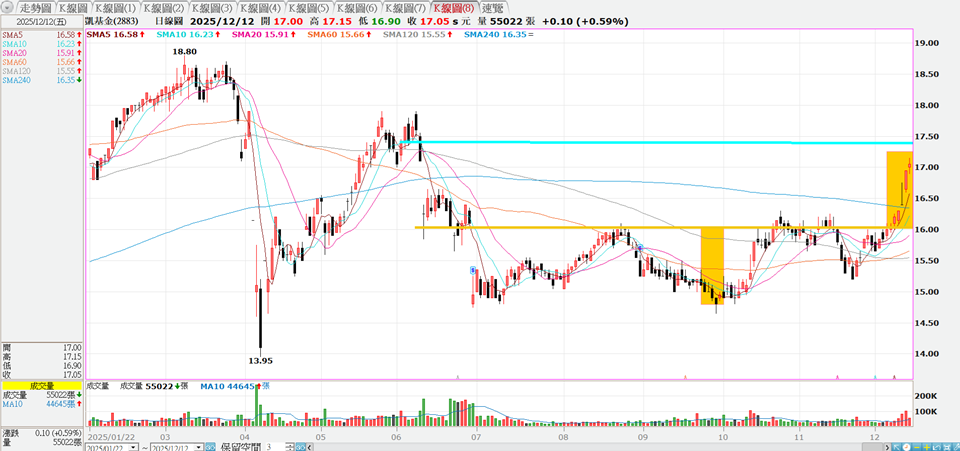  

### 個股解盤  

* 建通(2460)  
  看法：些微反彈但仍未站回頸線，這檔就先觀察至今日。                       

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'2460')

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-27'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-08-11']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-04-11'
    bottom_price = range_prices.loc['2025-04-11']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(neckline_end_date,neckline_price),(neckline_end_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('2460','2024-11-26','2025-12-12',line_drawing_callback)
display(image)

籌碼面：  
法人○○( )：外資○○( )、投信○○( )、自營○○( )。  
主力○○( )。  
分公司買賣家數差○○( )。  
融資○○( )、融券○○( )。  

* 正文(4906)  
  看法：      

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'4906')

> **盤後**：底部反轉交易策略分析  

In [10]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-31'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-08-27']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-08-13'
    bottom_price = range_prices.loc['2025-08-13']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(neckline_end_date,neckline_price),(neckline_end_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為33.70元


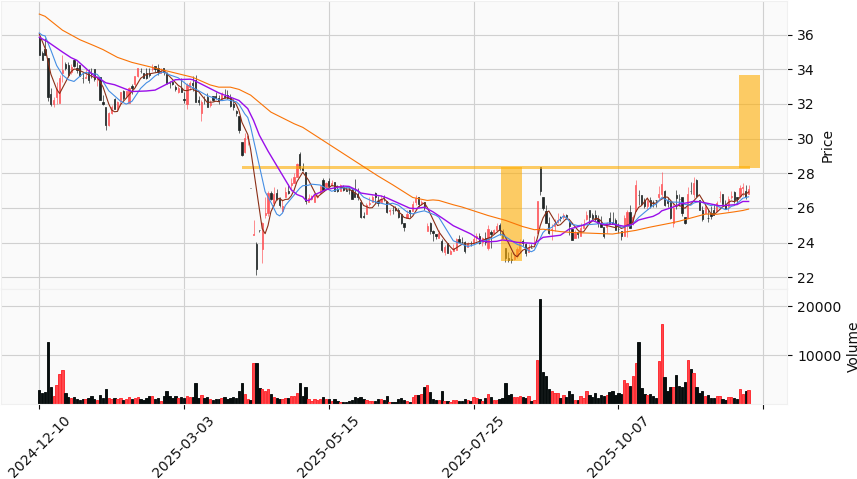

In [11]:
image = mysys.DrawOnKlineChart('4906','2024-12-10','2025-12-11',line_drawing_callback)
display(image)

籌碼面：  
法人○○( )：外資○○( )、投信○○( )、自營○○( )。  
主力○○( )。  
分公司買賣家數差○○( )。  
融資○○( )、融券○○( )。  